In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer

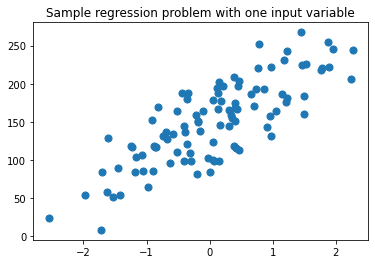

In [3]:
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names]
y_fruits = fruits['fruit_label']
target_names  = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']


from sklearn.datasets import make_regression 
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1 ,y_R1 = make_regression(n_samples = 100 , n_features=1 , n_informative= 1, bias =150.0 , noise = 30, random_state = 0)
plt.scatter(X_R1 , y_R1 , marker = 'o', s = 50)
plt.show()

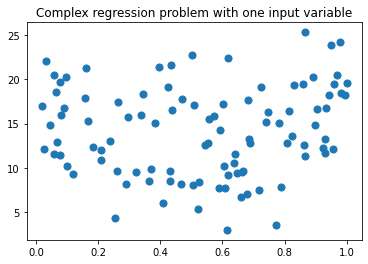

In [4]:
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

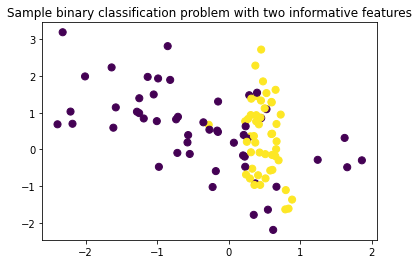

In [5]:
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50)
plt.show()

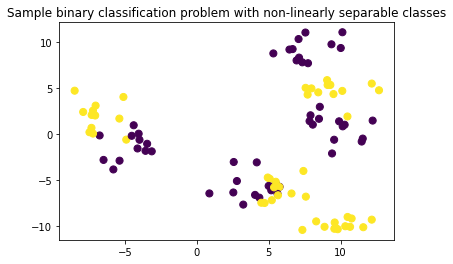

In [6]:
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()

In [7]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

### Naive Bayes classifiers
Naive라고 불리는 이유는 각 인스턴스의  특징이 분류 내에서 독립적이라고 가정하기 때문,but 대부분의 경우 특징은 서로 연관성이 있다.


P(B|A) 특정개체 A가 특적그룹 B에 속할 사후확률, P(B|A)는 특정그룹 B인 경우에 특정 개체 A가 거기에 속할 조건부 확률이며 가능성이다.
P(B)는 특정 그룹 B가 발생할 빈도 , 즉 클래스 사전고유 확률이며 P(A)는 특정개체가 발생할 확률, 사전확률이라고 하며, 모든 그룹에 대해 동일하기 때문에 보통 이 항목은 무시가 된다. 구하고자 하는 사후확률은 가능성(Likelihood)와 사전고유확률(Class Prior Probability)의 곱 

In [8]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)

y_pred = nbclf.predict(X_test)

from sklearn import metrics
print('Accuracy :',metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.84


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


Naïve Bayes classifier types  
• Bernoulli: binary features (e.g. word presence/absence)
• Multinomial: discrete features (e.g. word counts)  
• Gaussian: continuous/real-valued features  
– Statistics computed for each class:  
• For each feature: mean, standard deviatio 

Naïve Bayes classifiers: Pros and Cons

Pros:  
• Easy to understand  
• Simple, efficient parameter estimation  
• Works well with high- dimensional data  
• Often useful as a baseline comparison against more sophisticated methods  

Cons:  
• Assumption that features are conditionally independent given the class is not realistic.  
• As a result, other classifier types often have better generalization performance.  
• Their confidence estimates for predictions are not very accurate  

### Random Forests

통상블은 복수의 개별 학습 모델을 가지고 통합시켜 어느 개별 모델보다 뛰어난 통합된 모델을 만드는것   
효과적인 이유는 여러 다른 학습 모델들을 갖고 있을때 그 각각이 잘 작동할지라도 문제가 발생 할 수 있다. 보통문제점은 각 모델이 데이터의 일정 부분에서 overfit이 일어나서 이다. 여러 다른 모델을 합쳐 앙상블로 만듦으로 각 실수를 평균내어 overfiting의 위험성을 줄이면서, 강한 예측 능력을 유지할 수 있다. 


In [10]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
clf = RandomForestClassifier().fit(X_train, y_train)

print('Random Forest Classirier Accuracy on training set:', clf.score(X_train, y_train))
print('Random Forest Classirier Accuracy on test set:',clf.score(X_test, y_test))

Random Forest Classirier Accuracy on training set: 1.0
Random Forest Classirier Accuracy on test set: 0.76


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,
                                                   y_fruits.values,
                                                   random_state = 0)

clf = RandomForestClassifier(n_estimators = 10, 
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [12]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.97


Random Forest max_features Parameter    
• Learning is quite sensitive to max_features.    
• Setting max_features = 1 leads to forests   with diverse, more complex trees.    
• Setting max_features = <close to number of features> will lead to similar forests with simpler trees 

Random Forest: Pros and Cons  
Pros:• Widely used, excellent prediction performance on many problems.  
• Doesn't require careful normalization of features or extensive parameter tuning.  
• Like decision trees, handles a mixture of feature types.  
• Easily parallelized across multiple CPUs.  

Cons:  
• The resulting models are often difficult for humans to interpret. 
• Like decision trees, random forests may not be a good choice for very high- dimensional tasks (e.g. text classifiers) compared to   
fast, accurate linear models.  

--------------------------------------------------------------------------------------------------------------------------------------

Random Forests: RandomForestClassifier  
Key Parameters  
• n_estimators: number of trees to use in ensemble (default: 10).  
– Should be larger for larger datasets to reduce overfitting (but uses more computation).  
• max_features: has a strong effect on performance. Influences the diversity of trees in the forest.  
– Default works well in practice, but adjusting may lead to some further gains.  
• max_depth: controls the depth of each tree (default: None. Splits until all leaves are pure).  
• n_jobs: How many cores to use in parallel during training.   
• Choose a fixed setting for the random_state parameter if you need reproducible results

### Gradient-boosted decision trees

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,
                                                   y_fruits.values,
                                                   random_state = 0)


clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


### Neural Networks

Multi-later Perceptron (다중퍼셉트론)  
MLP는 로지스틱 회귀 처럼 입력특징의 가중합 연산개념을 갖고 있다. 하지만 한 단계 더 나아가 Hidden layer(Hidden unit) 단계를 추가   
각 Hidden layer 안의 Hidden unit은 입력 특성 가중합의 비선형 함수를 연산한다. 이를 활성화 함수라고 부른다. 


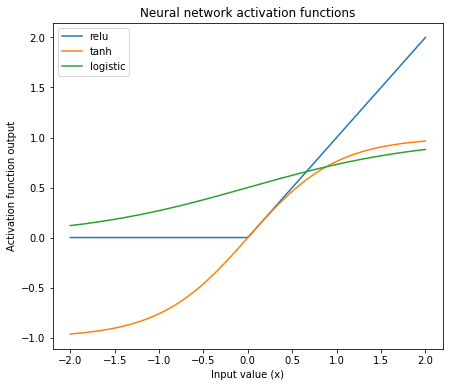

In [15]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97


Neural Networks: Pros and Cons  
Pros:  
• They form the basis of state-of-the-art models and can be formed into advanced architectures that effectively capture   
complex features given enough data and computation.  
Cons:  
• Larger, more complex models require significant training time, data, and customization.  
• Careful preprocessing of the data is needed.  
• A good choice when the features are of similar types, but less so when features of very different types.  


Neural Nets: MLPClassifier and MLPRegressor  
Important pParameters  
• hidden_layer_sizes: sets the number of hidden layers (number of elements in list), and number of hidden units per layer (each list   element). Default: (100).  
• alpha: controls weight on the regularization penalty that shrinks weights to zero. Default: alpha = 0.0001.  
• activation: controls the nonlinear function used for the activation function, including: 'relu' (default), 'logistic', 'tanh'

### Deep Learning 

Deep learning architectures combine a sophisticated automatic feature extraction phase with a supervised 
learning phase.

• The feature extraction phase uses a hierarchy of multiple feature extraction layers.  
• Starting from primitive, low-level features in the initial layer, each feature layer's output provides   the input features to the next higher feature layer.  
• All features are used in the final supervised learning model  

Pros and Cons of Deep Learning
• Pros:
– Powerful: deep learning has achieved significant gains over other machine learning   
approaches on many difficult learning tasks, leading to state-of-the-art performance across  
many different domains.   
– Does effective automatic feature extraction, reducing the need for guesswork and heuristics  
on this key problem.    
– Current software provides flexible architectures that can be adapted for new domains fairly   
easily.  
  
• Cons:  
– Can require huge amounts of training data.  
– Can require huge amounts of computing power.  
– Architectures can be complex and often must be highly tailored to a specific application.  
– The resulting models may not be easily interpretable  

### Data Leakage

When the data you're using to train contains information about what you're trying to predict.
• Introducing information about the target during   
training that would not legitimately be available during actual use.  
• Obvious examples:
– Including the label to be predicted as a feature  
– Including test data with training data  
• If your model performance is too good to be true, it   
probably is and likely due to "giveaway" features.  

Detecting data leakage  
• Before building the model  
– Exploratory data analysis to find surprises in the data  
– Are there features very highly correlated with the target value?  

• After building the model  
– Look for surprising feature behavior in the fitted model.  
– Are there features with very high weights, or high information gain?  
– Simple rule-based models like decision trees can help with features like account numbers, patient IDs    
– Is overall model performance surprisingly good compared to known results on   
the same dataset, or for similar problems on similar datasets?  

• Limited real-world deployment of the trained model  
– Potentially expensive in terms of development time, but more realistic  
– Is the trained model generalizing well to new data?  


Minimizing Data Leakage  
• Perform data preparation within each cross-validation fold separately – Scale/normalize data, perform feature selection, etc. within each fold separately, not using   
the entire dataset.  
– For any such parameters estimated on the training data, you must use those same   
parameters to prepare data on the corresponding held-out test fold.  

• With time series data, use a timestamp cutoff   
– The cutoff value is set to the specific time point where prediction is to occur using current and   
past records.  
– Using a cutoff time will make sure you aren't accessing any data records that were gathered   
after the prediction time, i.e. in the future.  

• Before any work with a new dataset, split off a final test validation dataset  
– … if you have enough data  
– Use this final test dataset as the very last step in your validation  
– Helps to check the true generalization performance of any trained model 